In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bmark.utils.config import load_config
from bmark.utils.dataset import get_kfold_ind
sns.set()

In [2]:
paths = load_config()
ad = sc.read_h5ad(paths['pilot']['data_dir']/'consolidated.h5ad')

In [3]:
# Training and validation splits for a particular fold
train_ind, val_ind = get_kfold_ind(obs=ad.obs, stratify_by='cluster_label', fold=0, n_folds=10)
ad_train = ad[train_ind,:]
ad_val = ad[val_ind,:]
print(f'train size: {ad_train.shape[0]}, val. size: {ad_val.shape[0]}')

train size: 36023, val. size: 4003


In [4]:
#Ordering categorical values for plotting convenience
from pandas.api.types import CategoricalDtype

df = ad.obs.copy()[['cluster_id', 'cluster_label']]
df = df.drop_duplicates().sort_values(by='cluster_id').reset_index(drop=True)
cat_type = CategoricalDtype(categories=df['cluster_label'].to_list(), ordered=True)
ad.obs['cluster_label'] = ad.obs['cluster_label'].astype(cat_type)

df = ad.obs.copy()[['subclass_id', 'subclass_label']]
df = df.drop_duplicates().sort_values(by='subclass_id').reset_index(drop=True)
cat_type = CategoricalDtype(categories=df['subclass_label'].to_list(), ordered=True)
ad.obs['subclass_label'] = ad.obs['subclass_label'].astype(cat_type)

In [5]:
col_dict = ad.obs[['cluster_label','cluster_color']].drop_duplicates()
col_dict = dict(zip(col_dict['cluster_label'], col_dict['cluster_color']))

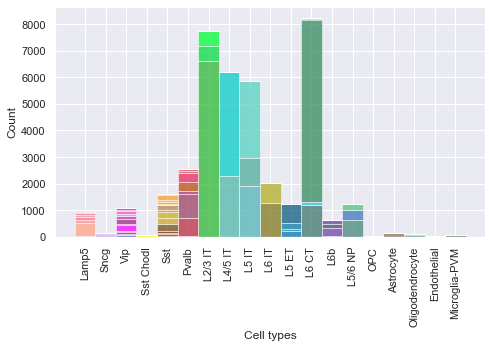

In [6]:
f, ax = plt.subplots(1,1,figsize=(7, 5))
s = sns.histplot(data=ad.obs, x="subclass_label", hue="cluster_label", 
                 multiple="stack",palette=col_dict,edgecolor="1",linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_xlabel('Cell types')
s.legend_.remove()
#l = ax.get_legend()
#l.set(**{'bbox_to_anchor':(1.0, 1)})
plt.tight_layout()

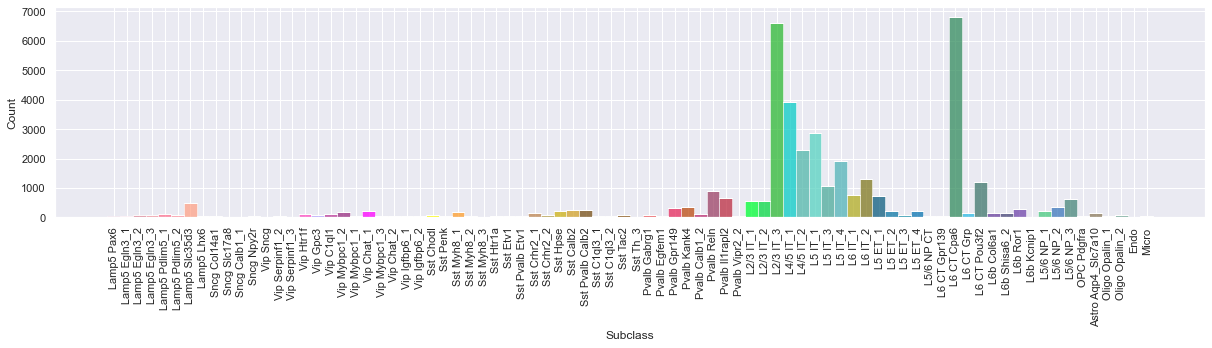

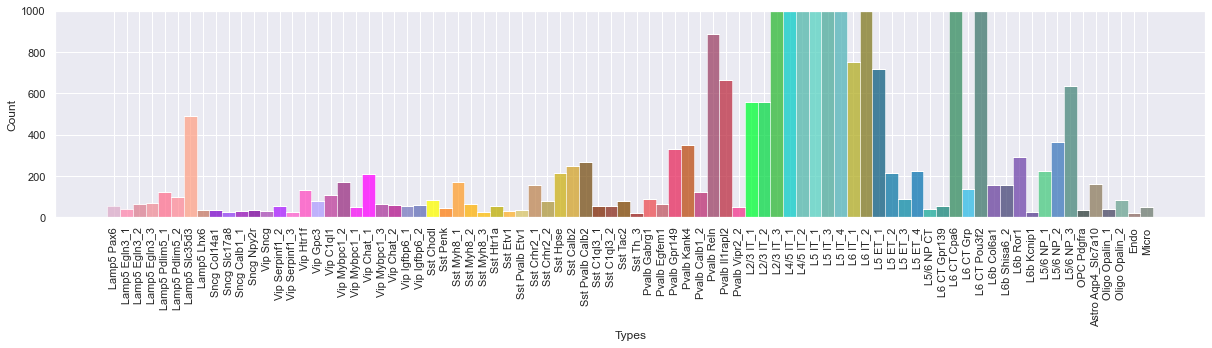

In [7]:
f, ax = plt.subplots(1, 1, figsize=(17, 5))
s = sns.histplot(data=ad.obs, x="cluster_label", hue="cluster_label",
                 multiple="stack", palette=col_dict, edgecolor="1", linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Subclass')
s.legend_.remove()
#l = ax.get_legend()
#l.set(**{'bbox_to_anchor':(1.0, 1)})
plt.tight_layout()
plt.show()

f, ax = plt.subplots(1, 1, figsize=(17, 5))
s = sns.histplot(data=ad.obs, x="cluster_label", hue="cluster_label",
                 multiple="stack", palette=col_dict, edgecolor="1", linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Types', ylim=(0, 1000))
s.legend_.remove()
plt.tight_layout()
plt.show()